### Chapter 05 데이터 시각화하기
#### 05-1 맷플롯립 기본 요소 알아보기
--- 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

ns_book7 = pd.read_csv('data/ns_book7.csv', low_memory = False)
print(ns_book7.shape)
ns_book7.head()

(376129, 13)


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0.0,2021-03-19


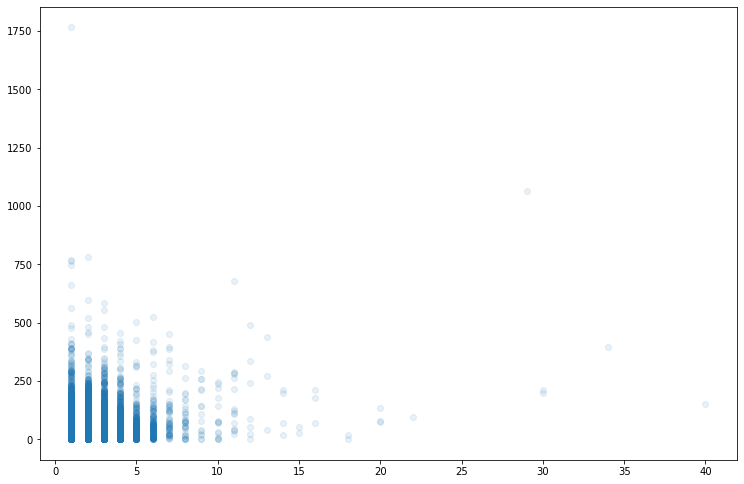

In [2]:
## plt.figure(figsize = (,)) : figsize는 인치단위의 값을 사용한다. 
## 픽셀값을 알고 있다면, dpi 기본값 72로 나누어 인치값을 얻을 수 있다. 
plt.figure(figsize = (900/72, 600/72))  #--> 900x600 픽셀로 표시하려면, 12.5x8.3인치로 
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1)
plt.show()

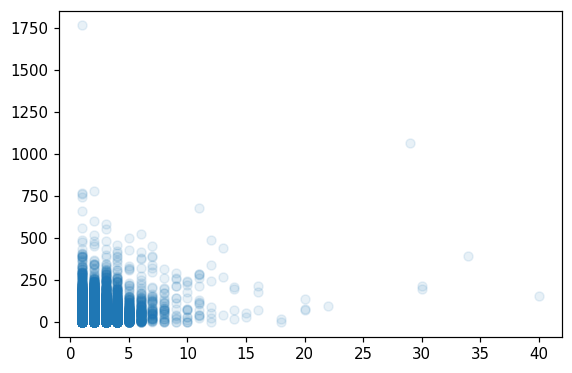

In [3]:
## dpi 기본값 = 72를 변경하기 
plt.figure(dpi=72*1.5) 
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1)

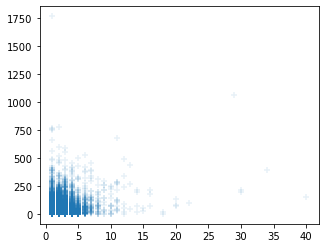

In [4]:
## marker 모양 변경 : ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize = (5,4))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1, marker = '+')

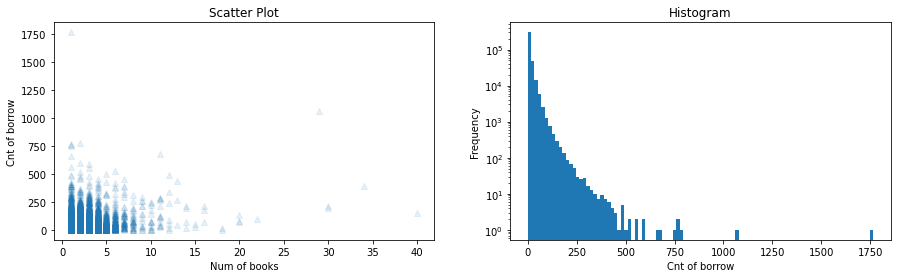

In [5]:
## subplot() 
fig, axs = plt.subplots(1,2, figsize = (15,4))

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1, marker = '^')
axs[0].set_title('Scatter Plot')
axs[0].set_xlabel('Num of books')
axs[0].set_ylabel('Cnt of borrow')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('Histogram')
axs[1].set_xlabel('Cnt of borrow')
axs[1].set_ylabel('Frequency')
axs[1].set_yscale('log')

fig.show()

--- 
#### 05-2 선 그래프와 막대 그래프 그리기

In [6]:
## line plot용 데이터 : 연도별 도서갯수 구하기 
count_by_year = ns_book7['발행년도'].value_counts().sort_index()
print(count_by_year)
count_by_year = count_by_year[count_by_year.index <= 2030]
print(count_by_year)

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64
1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11780
2021     1245
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64


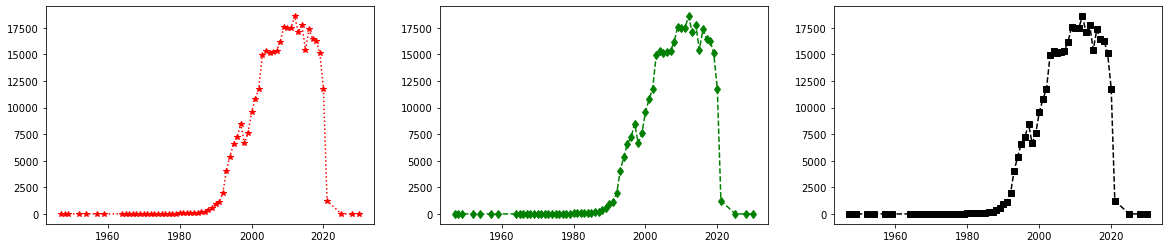

In [7]:
## line plot에서 marker, linestyle, color 지정하기 
fig, axs = plt.subplots(1,3, figsize = (20,4))
axs[0].plot(count_by_year, '*:r')
axs[1].plot(count_by_year, 'd--g')
axs[2].plot(count_by_year, 's--k')
fig.show()

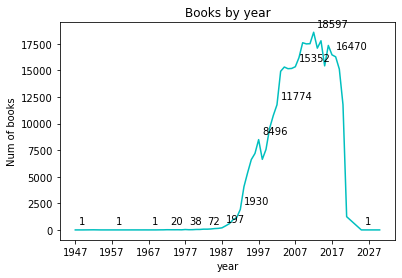

In [13]:
## plt.xticks, plt.yticks : 축 범위 지정하기 
## annotate : 차트에 값 표시하기 
plt.plot(count_by_year, color = 'c')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('Num of books')

plt.xticks(range(1947, 2030, 10))

## 연도를 5년씩 이동하며 값을 items()를 사용하여 튜플로 저장 
## 그래프에 나타낼 값과, 위치를 지정 (xytext는 값의 표시위치를 미세조정)
for idx, val in count_by_year[::5].items():  
    plt.annotate(val, (idx, val), xytext = (idx+1, val+500))
plt.show()

In [14]:
## bar plot용 데이터 : 주제별 도서갯수 구하기 (주제분류번호의 첫번째 자리수만 추출)
print(ns_book7['주제분류번호'].value_counts())

def kdc_1st_char(no):
    if no is np.nan : 
        return '-1'
    else: 
        return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
print(count_by_subject)

813.6         14815
843           12716
818            6230
813.8          5906
813.7          5334
              ...  
618.3             1
326.211091        1
375.438           1
606.9116          1
340.9257          1
Name: 주제분류번호, Length: 12462, dtype: int64
8     108600
3      80720
5      40875
9      26362
6      25051
1      22631
-1     16551
7      15818
4      13680
2      13469
0      12372
Name: 주제분류번호, dtype: int64


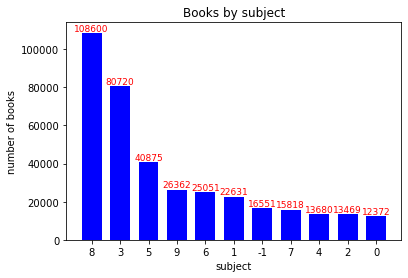

In [21]:
## bar 그래프 그리기 (width=0.7 : 막대의 두께 지정)
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    ## textcoords='offset points' : 값의 표시위치를 포인트단위로 조정 
    ## ha='center' : 값의 표시위치 조정 
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points', fontsize=9, ha='center', color='r')
plt.show()

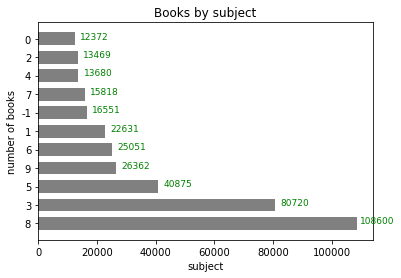

In [31]:
## 가로막대의 경우 두께는 width가 아니라 height임을 주의 
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='gray')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    ## textcoords='offset points' : 값의 표시위치를 포인트단위로 조정 
    ## ha='center' : 값의 표시위치 조정 
    plt.annotate(val, (val, idx), xytext=(20,0), textcoords='offset points', fontsize=9, ha='center', color='green')
plt.show()

---
#### 이미지 저장 및 불러오기 
- plt.savefig() : 이미지 저장
- plt.imshow() : 이미지 불러오기 
---

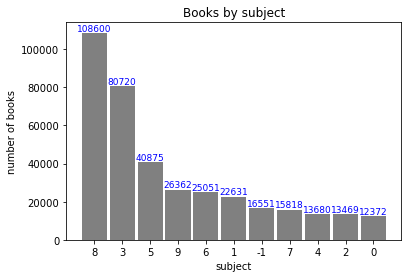

In [44]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.9, color='gray')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    ## textcoords='offset points' : 값의 표시위치를 포인트단위로 조정 
    ## ha='center' : 값의 표시위치 조정 
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points', fontsize=9, ha='center', color='blue')
    plt.savefig('data/img_books_by_subject.png')
plt.show()

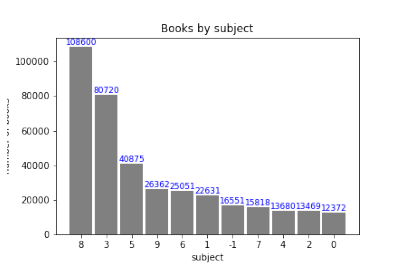

In [45]:
from PIL import Image
a = Image.open('data/img_books_by_subject.png')

plt.figure(figsize = (7,7))
plt.imshow(a)
plt.axis('off')
plt.show()